# Exploratory Data Analysis with NumPy and Pandas

date: 2018-04-28T12:40:00
updated: 2018-05-05
author: Graham Wheeler
category: Data Science
comments: enabled
tags: Python, Jupyter, Data Science, Pandas

<!--eofm-->

*This is the third post in a series based off my [Python for Data Science bootcamp](https://github.com/gramster/pythonbootcamp) I run at eBay occasionally. The other posts are:*

- *[a Python crash course](/post/python-crash-course/)*
- *[using Jupyter](/post/using-jupyter/)*
- *[introductory machine learning](/post/basic-machine-learning/).*

This is an introduction to the NumPy and Pandas libraries that form the foundation of data science in Python. These libraries, especially Pandas, have a large API surface and many powerful features. There is now way in a short amount of time to cover every topic; in many cases we will just scratch the surface. But after this you should understand the fundamentals, have an idea of the overall scope, and have some pointers for extending your learning as you need more functionality.

## Introduction

We'll start by importing the numpy and pandas packages. Note the "as" aliases; it is conventional to use "np" for numpy and "pd" for pandas. If you are using Anaconda Python distribution, as recommended for data science, these packages should already be available:

In [1]:
import numpy as np
import pandas as pd

We are going to do some plotting with the matplotlib and Seaborn packages. We want the plots to appear as cell outputs inline in Jupyter.
To do that we need to run this next line:
<!-- TEASER_END -->

In [2]:
%matplotlib inline

We're going to use the Seaborn library for better styled charts, and it may not yet be installed. To install it, if you are running at the command line and using Anaconda, use:

    conda config --add channels conda-forge
    conda install seaborn

Else use `pip`:

    pip install seaborn

If you are running this in Jupyter from an Anaconda installation, use:

In [ ]:
# sys.executable is the path to the Python executable; e.g. /usr/bin/python
import sys
!conda config --add channels conda-forge
!conda install --yes --prefix {sys.prefix} seaborn

We need to import the plotting packages. We're also going to change the default style for matplotlib plots to use Seaborn's styling:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Call sns.set() to change the default styles for matplotlib to use Seaborn styles.
sns.set()

## NumPy - the Foundation of Data Science in Python

Data science is largely about the manipulation of (often large) collections of numbers. To support effective data science a language needs a way to do this efficiently. Python lists are suboptimal because they are heterogeneous collections of object references; the objects in turn have reference counts for garbage collection, type info, size info, and the actual data. Thus storing (say) a list of a four 32-bit integers, rather than requiring just 16 bytes requires much more. Furthermore there is typically poor locality of the items referenced from the list, leading to cache misses and other performance problems. Python does offer an `array` type which is homogeneous and improves on lists as far as storage goes, but it offers limited operations on that data.

NumPy bridges the gap, offering both efficient storage of homogeneous data in single or multi-dimensional arrays, and a rich set of computationally -efficient operations on that data.

In this section we will cover some of the basics of NumPy. We won't go into too much detail as our main focus will be Pandas, a library built on top of NumPy that is particularly well-suited to manipulating tabular data. You can get a deeper intro to NumPy here: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

In [5]:
# Create a one-dimensional NumPy array from a range
a = np.arange(1, 11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# Create a one-dimensional NumPy array from a range with a specified increment
a = np.arange(0.5, 10.5, 0.5)
a

array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ])

In [7]:
# Reshape the array into a 4x5 matrix
a = a.reshape(4, 5)
a

array([[  0.5,   1. ,   1.5,   2. ,   2.5],
       [  3. ,   3.5,   4. ,   4.5,   5. ],
       [  5.5,   6. ,   6.5,   7. ,   7.5],
       [  8. ,   8.5,   9. ,   9.5,  10. ]])

In [8]:
# Get the shape and # of elements
print(np.shape(a))
print(np.size(a))

(4, 5)
20


In [9]:
# Create one dimensional NumPy array from a list
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [10]:
# Append a value
b = a
a = np.append(a, 4)  # Note that this makes a copy; the original array is not affected
print(b)
print(a)

[1 2 3]
[1 2 3 4]


In [11]:
# Index and slice
print(f'Second element of a is {a[1]}')
print(f'Last element of a is {a[-1]}')
print(f'Middle two elements of a are {a[1:3]}')

Second element of a is 2
Last element of a is 4
Middle two elements of a are [2 3]


In [12]:
# Create an array of zeros of length n
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [13]:
# Create an array of 1s
np.ones(5)

array([ 1.,  1.,  1.,  1.,  1.])

In [14]:
# Create an array of 10 random integers between 1 and 100
np.random.randint(1,100, 10)

array([52, 77, 50, 29, 31, 43, 14, 41, 25, 82])

In [15]:
# Create linearly spaced array of 5 values from 0 to 100
np.linspace(0, 100, 5)

array([   0.,   25.,   50.,   75.,  100.])

In [16]:
# Create a 2-D array from a list of lists
b = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [17]:
# Get the shape, # of elements, and # of dimensions
print(np.shape(b))
print(np.size(b))
print(np.ndim(b))

(3, 3)
9
2


In [18]:
# Get the first row of b; these are equivalent
print(b[0]) 
print(b[0,:])  # First row, "all columns"

[1 2 3]
[1 2 3]


In [19]:
# Get the first column of b
print(b[:,0])

[1 4 7]


In [20]:
# Get a subsection of b, from 1,1 through 2,2 (i.e. before 3,3)
print(b[1:3,1:3])

[[5 6]
 [8 9]]


Numpy supports Boolean operations on arrays and using arrays of Boolean values to select elements:

In [21]:
# Get an array of Booleans based on whether entries are odd or even numbers
b%2 == 0

array([[False,  True, False],
       [ True, False,  True],
       [False,  True, False]], dtype=bool)

In [22]:
# Use Boolean indexing to set all even values to -1
b[b%2 == 0] = -1
b

array([[ 1, -1,  3],
       [-1,  5, -1],
       [ 7, -1,  9]])

### UFuncs

NumPy supports highly efficient low-level operations on arrays called UFuncs (Universal Functions).

In [23]:
np.mean(b)  # Get the mean of all the elements

2.3333333333333335

In [24]:
np.power(b, 2)  # Raise every element to second power

array([[ 1,  1,  9],
       [ 1, 25,  1],
       [49,  1, 81]])

You can get the details on UFuncs here: https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html

### Dates and Times in NumPy

NumPy uses 64-bit integers to represent datetimes:

In [25]:
np.array('2015-12-25', dtype=np.datetime64)  # We use an array just so Jupyter will show us the type details

array(datetime.date(2015, 12, 25), dtype='datetime64[D]')

Note the "[D]" after the type. NumPy is flexible in how the 64-bits are allocated between date and time components. Because we specified a date only, it assumes the granularity is days, which is what the "D" means. There are a number of other possible units; the most useful are:

| Y	| Years |
|---|-------|
| M	| Months |
| W	| Weeks |
| D	| Days |
| h	| Hours |
| m	| Minutes |
| s	| Seconds |
| ms | Milliseconds |
| us | Microsecond |

Obviously the finer the granularity the more bits are assigned to fractional seconds leaving less for years so the range dates we can represent shrinks. The values are signed integers; in most cases 0 would be 0AD but for some very fine granularity units 0 is Jan 1, 1970 (e.g. "as" is attoseconds and the range here is less than 10 seconds either side of the start of 1970!). 

There is also a default "ns" format suitable for most uses.

When constructing a NumPy datetime the units can be specified explicitly or inferred based on the initialization value's format:

In [26]:
np.array(np.datetime64('2015-12-25 12:00:00.00'))  # default to ms as that's the granularity in the datetime

array(datetime.datetime(2015, 12, 25, 12, 0), dtype='datetime64[ms]')

In [27]:
np.array(np.datetime64('2015-12-25 12:00:00.00', 'us'))  # use microseconds 

array(datetime.datetime(2015, 12, 25, 12, 0), dtype='datetime64[us]')

NumPy's date parsing is very limited and for the most part we will use Pandas datetime types that we will discuss later.

## Pandas

NumPy is primarily aimed at scientific computation e.g. linear algebra. As such, 2D data is in the form of arrays of arrays. In data science applications, we are more often dealing with tabular data; that is, collections of records (samples, observations) where each record may be heterogeneous but the schema is consistent from record to record. The Pandas library is built on top of NumPy to provide this type of representation of data, along with the types of operations more typical in data science applications, like indexing, filtering and aggregation. There are two primary classes it provides for this, Series and DataFrame. 

### Pandas Series

A Pandas Series is a one-dimensional array of indexed data. It wraps a sequence of values (a NumPy array) and a sequence of indices (a `pd.Index` object), along with a name. Pandas indexes can be thought of as immutable dictionaries mapping keys to locations/offsets in the value array; the dictionary implementation is very efficient and there are specialized versions for each type of index (int, float, etc).

> For those interested, the underlying implementation used for indexes in Pandas is klib: https://github.com/attractivechaos/klib


In [28]:
squares = pd.Series([1, 4, 9, 16, 25])
print(squares.name)
squares

None


0     1
1     4
2     9
3    16
4    25
dtype: int64

From the above you can see that by default, a series will have numeric indices assigned, as a sequential list starting from 0, much like a typical Python list or array. The default name for the series is `None`, and the type of the data is `int64`.

In [29]:
squares.values

array([ 1,  4,  9, 16, 25])

In [30]:
squares.index

RangeIndex(start=0, stop=5, step=1)

You can show the first few lines with `.head()`. The argument, if omitted, defaults to 5.

In [31]:
squares.head(2)

0    1
1    4
dtype: int64

The data need not be numeric:

In [32]:
data = pd.Series(["quick", "brown", "fox"], name="Fox")
data

0    quick
1    brown
2      fox
Name: Fox, dtype: object

Above, we have assigned a name to the series, and note that the data type is now `object`. Think of Pandas `object` as being strings/text and/or `None` rather than generic Python objects; this is the predominant usage.

What if we combine integers and strings?

In [33]:
data = pd.Series([1, "quick", "brown", "fox"], name="Fox")
data

0        1
1    quick
2    brown
3      fox
Name: Fox, dtype: object

We can have "missing" values using None:

In [34]:
data = pd.Series(["quick", None, "fox"], name="Fox")
data

0    quick
1     None
2      fox
Name: Fox, dtype: object

For a series of type `object`, `None` can simply be included, but what if the series is numeric?

In [35]:
data = pd.Series([1, None, 3])
data

0    1.0
1    NaN
2    3.0
dtype: float64

As you can see, the special float value *NaN* (`np.nan`, for 'not a number') is used in this case. This is also why the series has been changed to have type float64 and not int64; floating point numbers have special reserved values to represent NaN while ints don't.

Be careful with NaN; it will fail equality tests:

In [36]:
np.nan == np.nan

False

Instead you can use `is` or `np.isnan()`:

In [37]:
print(np.nan is np.nan)
print(np.isnan(np.nan))

True
True


Normal indexing and slicing operations are available, much like Python lists:

In [38]:
squares[2]

9

In [39]:
squares[2:4]

2     9
3    16
dtype: int64

Where NumPy arrays have implicit integer sequence indices, Pandas indices are explicit and need not be integers:

In [40]:
squares = pd.Series([1, 4, 9, 16, 25], 
                    index=['square of 1', 'square of 2', 'square of 3', 'square of 4', 'square of 5'])
squares

square of 1     1
square of 2     4
square of 3     9
square of 4    16
square of 5    25
dtype: int64

In [41]:
squares['square of 3']

9

As you can see, a Series is a lot like a Python dict (with additional slicing like a list). In fact, we can construct one from a Python dict:

In [42]:
pd.Series({'square of 1':1, 'square of 2':4, 'square of 3':9, 'square of 4':16, 'square of 5':25})

square of 1     1
square of 2     4
square of 3     9
square of 4    16
square of 5    25
dtype: int64

You can use both a dictionary and an explicit index but be careful if the index and dictionary keys don't align completely; the explicit index takes precedence. Look at what happens:

In [43]:
pd.Series({"one": 1, "three": 3}, index=["one", "two"])

one    1.0
two    NaN
dtype: float64

### Exercise 1

Given the list below, create a Series that has the list as both the index and the values, and then display the first 3 rows:

In [44]:
ex1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']

A number of dict-style operations work on a Series:

In [45]:
'square of 5' in squares

True

In [46]:
squares.keys()

Index(['square of 1', 'square of 2', 'square of 3', 'square of 4',
       'square of 5'],
      dtype='object')

In [47]:
squares.items()  # Iterable

In [48]:
list(squares.items())

[('square of 1', 1),
 ('square of 2', 4),
 ('square of 3', 9),
 ('square of 4', 16),
 ('square of 5', 25)]

However, unlike with a Python dict, `.values` is an array attribute, not a function returning an iterable, so we use `.values`, not `.values()`:

In [49]:
squares.values 

array([ 1,  4,  9, 16, 25])

We can add new entries:

In [50]:
squares['square of 6'] = 36
squares

square of 1     1
square of 2     4
square of 3     9
square of 4    16
square of 5    25
square of 6    36
dtype: int64

change existing values:

In [51]:
squares['square of 6'] = -1
squares

square of 1     1
square of 2     4
square of 3     9
square of 4    16
square of 5    25
square of 6    -1
dtype: int64

and delete entries:

In [52]:
del squares['square of 6']
squares

square of 1     1
square of 2     4
square of 3     9
square of 4    16
square of 5    25
dtype: int64

Iteration (`.__iter__`) iterates over the values in a Series, while membership testing (`.__contains__`) checks the indices. `.iteritems()` will iterate over (index, value) tuples, similar to list's `.enumerate()`:

In [53]:
for v in squares:  # calls .__iter__()
    print(v)

1
4
9
16
25


In [54]:
print(16 in squares)
print('square of 4' in squares)  # calls .__contains__()

False
True


In [55]:
print(16 in squares.values) 

True


In [56]:
for v in squares.iteritems():
    print(v)

('square of 1', 1)
('square of 2', 4)
('square of 3', 9)
('square of 4', 16)
('square of 5', 25)


### Vectorized Operations

You can iterate over a Series or Dataframe, but in many cases there are much more efficient vectorized UFuncs available; these are implemented in native code exploiting parallel processor operations and are much faster. Some examples are `.sum()`, `.median()`, `.mode()`, and `.mean()`:

In [57]:
squares.mean()

11.0

Series also behaves a lot like a list. We saw some indexing and slicing earlier. This can be done on non-numeric indexes too, but be careful: it _includes_ the final value:

In [58]:
squares['square of 2': 'square of 4']

square of 2     4
square of 3     9
square of 4    16
dtype: int64

If one or both of the keys are invalid, the results will be empty: 

In [59]:
squares['square of 2': 'cube of 4']

Series([], dtype: int64)

### Exercise 2

Delete the row 'k' from the earlier series you created in exercise 1, then display the rows from 'f' through 'l'.

Something to be aware of, is that the index need not be unique:

In [60]:
people = pd.Series(['alice', 'bob', 'carol'], index=['teacher', 'teacher', 'plumber'])
people

teacher    alice
teacher      bob
plumber    carol
dtype: object

If we dereference a Series by a non-unique index we will get a Series, not a scalar!

In [61]:
people['plumber']

'carol'

In [62]:
people['teacher']

teacher    alice
teacher      bob
dtype: object

You need to be very careful with non-unique indices. For example, assignment will change all the values for that index without collapsing to a single entry!

In [63]:
people['teacher'] = 'dave'
people

teacher     dave
teacher     dave
plumber    carol
dtype: object

To prevent this you could use positional indexing, but my advice is to try to avoid using non-unique indices if at all possible. You can use the `.is_unique` property on the index to check:

In [64]:
people.index.is_unique

False

### DataFrames

A DataFrame is like a dictionary where the keys are column names and the values are Series that share the same index and hold the column values. The first "column" is actually the shared Series index (there are some exceptions to this where the index can be multi-level and span more than one column but in most cases it is flat).

In [65]:
names = pd.Series(['Alice', 'Bob', 'Carol'])
phones = pd.Series(['555-123-4567', '555-987-6543', '555-245-6789'])
dept = pd.Series(['Marketing', 'Accounts', 'HR'])

staff = pd.DataFrame({'Name': names, 'Phone': phones, 'Department': dept})  # 'Name', 'Phone', 'Department' are the column names
staff

,Department,Name,Phone
0,Marketing,Alice,555-123-4567
1,Accounts,Bob,555-987-6543
2,HR,Carol,555-245-6789


Note above that the first column with values 0, 1, 2 is actually the shared index, and there are three series keyed off the three names "Department", "Name" and "Phone".

Like `Series`, `DataFrame` has an index for rows:

In [66]:
staff.index

RangeIndex(start=0, stop=3, step=1)

`DataFrame` also has an index for columns:

In [67]:
staff.columns

Index(['Department', 'Name', 'Phone'], dtype='object')

In [68]:
staff.values

array([['Marketing', 'Alice', '555-123-4567'],
       ['Accounts', 'Bob', '555-987-6543'],
       ['HR', 'Carol', '555-245-6789']], dtype=object)

The index operator actually selects a column in the DataFrame, while the .iloc and .loc attributes still select rows (actually, we will see in the next section that they can select a subset of the DataFrame with a row selector and column selector, but the row selector comes first so if you supply a single argument to .loc or .iloc you will select rows):

In [69]:
staff['Name']  # Acts similar to dictionary; returns the Series for a column

0    Alice
1      Bob
2    Carol
Name: Name, dtype: object

In [70]:
staff.loc[2]

Department              HR
Name                 Carol
Phone         555-245-6789
Name: 2, dtype: object

You can get a transpose of the DataFrame with the .T attribute:

In [71]:
staff.T

,0,1,2
Department,Marketing,Accounts,HR
Name,Alice,Bob,Carol
Phone,555-123-4567,555-987-6543,555-245-6789


You can also access columns like this, with dot-notation. Occasionally this breaks if there is a conflict with a UFunc name, like 'count':

In [72]:
staff.Name 

0    Alice
1      Bob
2    Carol
Name: Name, dtype: object

You can add new columns. Later we'll see how to do this as a function of existing columns:

In [73]:
staff['Fulltime'] = True
staff.head()

,Department,Name,Phone,Fulltime
0,Marketing,Alice,555-123-4567,True
1,Accounts,Bob,555-987-6543,True
2,HR,Carol,555-245-6789,True


Use `.describe()` to get summary statistics:

In [74]:
staff.describe()

,Department,Name,Phone,Fulltime
count,3,3,3,3
unique,3,3,3,1
top,Accounts,Alice,555-123-4567,True
freq,1,1,1,3


Use `.quantile()` to get quantiles:

In [75]:
df = pd.DataFrame([2, 3, 1, 4, 3, 5, 2, 6, 3])
df.quantile(q=[0.25, 0.75])

,0
0.25,2.0
0.75,4.0


Use `.drop()` to remove rows. This will return a copy with the modifications and leave the original untouched unless you include the argument `inplace=True`.

In [76]:
staff.drop([1])

,Department,Name,Phone,Fulltime
0,Marketing,Alice,555-123-4567,True
2,HR,Carol,555-245-6789,True


In [77]:
# Note that because we didn't say inplace=True,
# the original is unchanged
staff

,Department,Name,Phone,Fulltime
0,Marketing,Alice,555-123-4567,True
1,Accounts,Bob,555-987-6543,True
2,HR,Carol,555-245-6789,True


There are many ways to construct a DataFrame. For example, from a Series or dictionary of Series, from a list of Python dicts, or from a 2-D NumPy array. There are also utility functions to read data from disk into a DataFrame, e.g. from a .csv file or an Excel spreadsheet. We'll cover some of these later.

Many DataFrame operations take an `axis` argument which defaults to zero. This specifies whether we want to apply the operation by rows (axis=0) or by columns (axis=1).

You can drop columns if you specify `axis=1`:

In [78]:
staff.drop(["Fulltime"], axis=1)

,Department,Name,Phone
0,Marketing,Alice,555-123-4567
1,Accounts,Bob,555-987-6543
2,HR,Carol,555-245-6789


Another way to remove a column in-place is to use `del`:

In [79]:
del staff["Department"]
staff

,Name,Phone,Fulltime
0,Alice,555-123-4567,True
1,Bob,555-987-6543,True
2,Carol,555-245-6789,True


You can change the index to be some other column. If you want to save the existing index, then first add it as a new column:

In [80]:
staff['Number'] = staff.index
staff

,Name,Phone,Fulltime,Number
0,Alice,555-123-4567,True,0
1,Bob,555-987-6543,True,1
2,Carol,555-245-6789,True,2


In [81]:
# Now we can set the new index. This is a destructive
# operation that discards the old index, which is
# why we saved it as a new column first.
staff = staff.set_index('Name')
staff

,Phone,Fulltime,Number
Name,,,
Alice,555-123-4567,True,0
Bob,555-987-6543,True,1
Carol,555-245-6789,True,2


Alternatively you can promote the index to a column and go back to a numeric index with `reset_index()`:

In [82]:
staff = df.reset_index()
staff

,index,0
0,0,2
1,1,3
2,2,1
3,3,4
4,4,3
5,5,5
6,6,2
7,7,6
8,8,3


### Exercise 3

Create a DataFrame from the dictionary below:

In [83]:
ex3data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
           'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
           'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
           'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

Then:

- Generate a summary of the data
- Calculate the sum of all visits (the total number of visits).


### More on Indexing

The Pandas Index type can be thought of as an immutable ordered multiset (multiset as indices need not be unique). The immutability makes it safe to share an index between multiple columns of a DataFrame. The set-like properties are useful for things like joins (a join is like an intersection between Indexes). There are dict-like properties (index by label) and list-like properties too (index by location). 

Indexes are complicated but understanding them is key to leveraging the power of pandas. Let's look at some example operations to get more familiar with how they work:

In [84]:
# Let's create two Indexes for experimentation

i1 = pd.Index([1, 3, 5, 7, 9])
i2 = pd.Index([2, 3, 5, 7, 11])

You can index like a list with `[]`:

In [85]:
i1[2]

5

You can also slice like a list:

In [86]:
i1[2:5]

Int64Index([5, 7, 9], dtype='int64')

The normal Python bitwise operators have set-like behavior on indices; this is very useful when comparing two dataframes that have similar indexes:

In [87]:
i1 & i2  # Intersection

Int64Index([3, 5, 7], dtype='int64')

In [88]:
i1 | i2  # Union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [89]:
i1 ^ i2  # Difference

Int64Index([1, 2, 9, 11], dtype='int64')

Series and DataFrames have an explicit Index but they also have an implicit index like a list. When using the `[]` operator, the type of the argument will determine which index is used:

In [90]:
s = pd.Series([1, 2], index=["1", "2"])
print(s["1"])  # matches index type; use explicit
print(s[1])  # integer doesn't match index type; use implicit positional

1
2


If the explicit Index uses integer values things can get confusing. In such cases it is good to make your intent explicit; there are attributes for this:

- `.loc` references the explicit Index
- `.iloc` references the implicit Index; i.e. a positional index 0, 1, 2,...

The Python way is "explicit is better than implicit" so when indexing/slicing it is better to use these. The example below illustrates the difference:

In [91]:
# Note: explicit index starts at 1; implicit index starts at 0
nums = pd.Series(['first', 'second', 'third', 'fourth'], index=[1, 2, 3, 4]) 

print(f'Item at explicit index 1 is {nums.loc[1]}')
print(f'Item at implicit index 1 is {nums.iloc[1]}')
print(nums.loc[1:3])
print(nums.iloc[1:3])

Item at explicit index 1 is first
Item at implicit index 1 is second
1     first
2    second
3     third
dtype: object
2    second
3     third
dtype: object


When using `.iloc`, the expression in `[]` can be:

* an integer, a list of integers, or a slice object (e.g. `1:7`)
* a Boolean array (see Filtering section below for why this is very useful)
* a function with one argument (the calling object) that returns one of the above

Selecting outside of the bounds of the object will raise an IndexError except when using slicing.

When using `.loc`, the expression in `[]` can be:

* an label, a list of labels, or a slice object with labels (e.g. `'a':'f'`; unlike normal slices the stop label is included in the slice)
* a Boolean array
* a function with one argument (the calling object) that returns one of the above

You can use one or two dimensions in `[]` after `.loc` or `.iloc` depending on whether you want to select a subset of rows, columns, or both.

You can use the `set_index` method to change the index of a DataFrame.

If you want to change entries in a DataFrame selectively to some other value, you can use assignment with indexing, such as:

```python
df.loc[row_indexer, column_indexer] = value
```

_Don't_ use:

```python
df[row_indexer][column_indexer] = value
```

That _chained indexing_ can result in copies being made which will not have the effect you expect. You want to do all your indexing in one operation. See the details at https://pandas.pydata.org/pandas-docs/stable/indexing.html
    
 ### Exercise 4
 
 Using the same DataFrame from Exercise 3:
 
 - Select just the 'animal' and 'age' columns from the DataFrame
 - Select the data in rows [3, 5, 7] and in columns ['animal', 'age']
 

### Loading/Saving CSV, JSON and Excel Files

Use `Pandas.read_csv` to read a CSV file into a dataframe. There are many optional argumemts that you can provide, for example to set or override column headers, skip initial rows, treat first row as containing column headers, specify the type of columns (Pandas will try to infer these otherwise), skip columns, and so on. The `parse_dates` argument is especially useful for specifying which columns have date fields as Pandas doesn't infer these.

Full docs are at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [92]:
crime = pd.read_csv('http://samplecsvs.s3.amazonaws.com/SacramentocrimeJanuary2006.csv',
                    parse_dates=['cdatetime'])
crime.head()

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,2006-01-01,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,2006-01-01,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,2006-01-01,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,2006-01-01,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,2006-01-01,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613


If you need to do some preprocessing of a field during loading you can use the `converters` argument which takes a dictionary mapping the field names to functions that transform the field. E.g. if you had a string field `zip` and you wanted to take just the first 3 digits, you could use:

```python
..., converters={'zip': lambda x: x[:3]}, ...
```

If you know what types to expect for the columns, you can (and, IMO, you should) pass a dictionary in with the `types` argument that maps field names to NumPy types, to override the type inference. You can see details of NumPy scalar types here: https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.scalars.html. Omit any fields that you may have already included in the `parse_dates` argument.

By default the first line is expected to contain the column headers. If it doesn't you can specify them yourself, using arguments such as:

```python
..., header=None, names=['column1name','column2name'], ...
```

If the separator is not a comma, use the `sep` argument; e.g. for a TAB-separated file:

```python
..., sep='\t', ...
```

Use `Pandas.read_excel` to load spreadsheet data. Full details here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

In [2]:
titanic = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Use the `DataFrame.to_csv` method to save a DataFrame to a file or `DataFrame.to_excel` to save as a spreadsheet.

It's also possible to read JSON data into a DataFrame. The complexity here is that JSON data is typically hierarchical; in order to turn it into a DataFrame the data typically needs to be flattened in some way. This is controlled by an `orient` parameter. For details see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html.

### Sorting

You can sort a DataFrame using the `sort_values` method:

```python
DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, na_position='last')
```
    
The `by` argument should be a column name or list of column names in priority order (if axis=0, i.e. we are sorting the rows, which is typically the case).

See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html for the details.
    

### Filtering

A Boolean expression on a Series will return a Series of Booleans:

In [94]:
titanic.survived == 1

0        True
1        True
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9       False
10      False
11       True
12       True
13       True
14       True
15      False
16      False
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286     True
1287    False
1288    False
1289    False
1290     True
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300     True
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

If you index a Series with a Boolean Series, you will select the items where the index is True. For example:

In [95]:
titanic[titanic.survived == 1].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


You can combine these with `&` (and) and `|` (or). Pandas uses these bitwise operators because Python allows them to be overloaded while 'and' and 'or' cannot be, and in any event they arguably make sense as they are operating on Boolean series which are similar to bit vectors.

As `&` and `|` have higher operator precedence than relational operators like `>` and `==`, the subexpressions we use with them need to be enclosed in parentheses:

In [96]:
titanic[titanic.survived & (titanic.sex == 'female') & (titanic.age > 50)].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
33,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA"


NumPy itself also supports such Boolean filtering; for example:

In [97]:
s = np.array([3, 2, 4, 1, 5])
s[s > np.mean(s)]  # Get the values above the mean

array([4, 5])

### Handling Missing Data

To see if there are missing values, we can use isnull() to get a DataFrame where there are null values:

In [98]:
titanic.isnull().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


The above will show us the first few rows that had null values. If we want to know which columns may have nulls, we can use:

In [99]:
titanic.isnull().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

`.any()` returns True if any are true; `.all()` returns True if all are true.
  
To drop rows that have missing values, use dropna(); add `inplace=True` to do it in place.

In [100]:
titanic.dropna().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In this case there are none - no-one could both be on a boat and be a recovered body, so at least one of these fields is always NaN.

It may be more useful to be selective. For example, if we want to get the rows in which ticket and cabin are not null:

In [3]:
filter = titanic.notnull()
filter.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,True,True,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,True,False,False,True
3,True,True,True,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,False,True


In [101]:
titanic[filter.ticket & filter.cabin].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We can use `.count()` to get the number of entries in each column that are not null.

In [102]:
titanic.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

To replace missing values with values of our choosing, we use `.fillna()`. With a single scalar argument it will replace all null entries in the DataFrame with that value. Usually we will want to be more granular and control which columns are affected in what ways. Let's see if there are rows with no fare specified:

In [103]:
titanic[~filter.fare]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


We can change the fare to zero by passing a dictionary as the argument rather than a scalar:

In [104]:
titanic.fillna({'fare': 0}, inplace=True)
titanic[~filter.fare]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,0.0,NaN,S,NaN,261.0,NaN


We could also use a `method="ffill"` argument for a forward fill or `method="bfill"` argument for a backward fill; these are most useful for time series data. Yet another option is to use the `.interpolate()` method to use interpolation for the missing values; that is beyond the scope of this notebook.

### Exercise 5

Using the previous DataFrame from exercise 3, do the following:

- Select only the rows where the number of visits is greater than or equal to 3
- Select the rows where the age is missing, i.e. is NaN
- Select the rows where the animal is a cat and the age is less than 3
- Select the rows the age is between 2 and 4 (inclusive)
- Change the index to use this list: `idx = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']`
- Change the age in row 'f' to 1.5.
- Append a new row 'k' to df with your choice of values for each column
- Then delete that row to return the original DataFrame

### Concatenation

`pandas.concat` can be used to concatenate Series and DataFrames:

In [105]:
s1 = pd.Series(['A', 'B', 'C'])
s2 = pd.Series(['D', 'E', 'F'])
df = pd.concat([s1, s2])
df

0    A
1    B
2    C
0    D
1    E
2    F
dtype: object

Note that the Indexes are concatenated too, so if you are using a simple row number index you can end up with duplicate values.

In [106]:
df[2]

2    C
2    F
dtype: object

 If you don't want this behavior use the `ignore_index` argument; a new index will be generated:

In [107]:
pd.concat([s1, s2], ignore_index=True)

0    A
1    B
2    C
3    D
4    E
5    F
dtype: object

Alternatively you can use `verify_integrity=True` to cause an exception to be raised if the result would have duplicate indices.

In [108]:
pd.concat([s1, s2], verify_integrity=True)

ValueError: Indexes have overlapping values: [0, 1, 2]

In [109]:
d1 = pd.DataFrame([['A1', 'B1'],['A2', 'B2']], columns=['A', 'B'])
d2 = pd.DataFrame([['C3', 'D3'],['C4', 'D4']], columns=['A', 'B'])
d3 = pd.DataFrame([['B1', 'C1'],['B2', 'C2']], columns=['B', 'C'])
pd.concat([d1, d2])

,A,B
0,A1,B1
1,A2,B2
0,C3,D3
1,C4,D4


We can join on other axis too:

In [110]:
pd.concat([d1, d2], axis=1)

,A,B,A,B
0,A1,B1,C3,D3
1,A2,B2,C4,D4


In [111]:
pd.concat([d1, d3], axis=1)

,A,B,B,C
0,A1,B1,B1,C1
1,A2,B2,B2,C2


If the columns are not completely shared, additional NaN entries will be made:

In [112]:
pd.concat([d1, d3])

,A,B,C
0,A1,B1,NaN
1,A2,B2,NaN
0,NaN,B1,C1
1,NaN,B2,C2


We can force concat to only include the columns that are shared with an inner join:

In [113]:
pd.concat([d1, d3], join='inner')

,B
0,B1
1,B2
0,B1
1,B2


See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html for more options.

### Merging and Joining

We have already seen how we can add a new column to a DataFrame when it is a fixed scalar value:

In [114]:
df = pd.DataFrame(['Fred', 'Alice', 'Joe'], columns=['Name'])
df

,Name
0,Fred
1,Alice
2,Joe


In [115]:
df['Married'] = False
df

,Name,Married
0,Fred,False
1,Alice,False
2,Joe,False


We can also give an array of values provided it has the same length, or we can use a Series keyed on the index if it is not the same length:

In [116]:
df['Phone'] = ['555-123-4567', '555-321-0000', '555-999-8765']
df

,Name,Married,Phone
0,Fred,False,555-123-4567
1,Alice,False,555-321-0000
2,Joe,False,555-999-8765


In [117]:
df['Department'] = pd.Series({0: 'HR', 2: 'Marketing'})
df

,Name,Married,Phone,Department
0,Fred,False,555-123-4567,HR
1,Alice,False,555-321-0000,NaN
2,Joe,False,555-999-8765,Marketing


Often we want to join two DataFrames instead. Pandas has a `merge` function that supports one-to-one, many-to-one and many-to-many joins. merge will look for matching column names between the inputs and use this as the key:

In [4]:
d1 = pd.DataFrame({'city': ['Seattle', 'Boston', 'New York'], 'population': [704352, 673184, 8537673]})
d2 = pd.DataFrame({'city': ['Boston', 'New York', 'Seattle'], 'area': [48.42, 468.48, 142.5]})
pd.merge(d1, d2)

,city,population,area
0,Seattle,704352,142.50
1,Boston,673184,48.42
2,New York,8537673,468.48


You can explicitly specify the column to join on; this is equivalent to the above example:

In [5]:
pd.merge(d1, d2, on='city')

,city,population,area
0,Seattle,704352,142.50
1,Boston,673184,48.42
2,New York,8537673,468.48


If there is more than one column in common, only items where the column values match in all cases will be included. Let's add a common column `x` and see what happens:

In [6]:
d10 = pd.DataFrame({'city': ['Seattle', 'Boston', 'New York'], 
                    'x': ['a', 'b', 'c'], 
                    'population': [704352, 673184, 8537673]})
d11 = pd.DataFrame({'city': ['Boston', 'New York', 'Seattle'], 
                    'x': ['a', 'c', 'b'], 
                    'area': [48.42, 468.48, 142.5]})
pd.merge(d10, d11)

,city,population,x,area
0,New York,8537673,c,468.48


You can see that Pandas avoided ambiguous cases by just dropping them.

However, if we specify the column for the join, Pandas will just treat the other common columns (if any) as distinct, and add suffixes to disambiguate the names:

In [7]:
pd.merge(d10, d11, on='city')

,city,population,x_x,area,x_y
0,Seattle,704352,a,142.50,b
1,Boston,673184,b,48.42,a
2,New York,8537673,c,468.48,c


If the column names to join on don't match you can specify the names to use explicitly:

In [120]:
d3 = pd.DataFrame({'place': ['Boston', 'New York', 'Seattle'], 'area': [48.42, 468.48, 142.5]})
pd.merge(d1, d3, left_on='city', right_on='place')

,city,population,area,place
0,Seattle,704352,142.50,Seattle
1,Boston,673184,48.42,Boston
2,New York,8537673,468.48,New York


In [121]:
# If you want to drop the redundant column:
pd.merge(d1, d3, left_on='city', right_on='place').drop('place', axis=1)

,city,population,area
0,Seattle,704352,142.50
1,Boston,673184,48.42
2,New York,8537673,468.48


`merge` joins on arbitrary columns; if you want to join on the index you can use `left_index` and `right_index`:

In [122]:
df1 = pd.DataFrame(list('ABC'), columns=['c1'])
df2 = pd.DataFrame(list('DEF'), columns=['c2'])
pd.merge(df1, df2, left_index=True, right_index=True)

,c1,c2
0,A,D
1,B,E
2,C,F


Pandas provides a utility method on DataFrame, `join`, to do the above:

In [123]:
df1.join(df2)

,c1,c2
0,A,D
1,B,E
2,C,F


`merge` can take a `how` argument that can be `inner` (intersection), `outer` (union), `left` (first augmented by second) or `right` (second augmented by first)  to control the type of join. `inner` joins are the default.

If there are other columns with the same name between the two DataFrames, Pandas will give them unique names by appending `_x` to the columns from the first argument and `_y` to the columns from the second argument.

It's also possible to use lists of column names for the `left_on` and `right_on` arguments to join on multiple columns.

For more info on merging see https://pandas.pydata.org/pandas-docs/stable/merging.html


### Exploring the Data

There are some more useful ways to explore the data in our DataFrame. Let's return to the Titanic data set, but this time we will use the sample dataset that comes with Seaborn, which is a bit different to the one we loaded before:

In [124]:
import seaborn as sns;

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


You can use `.unique()` to see the full set of distinct values in a series:

In [125]:
titanic.deck.unique()

[NaN, C, E, G, D, A, B, F]
Categories (7, object): [C, E, G, D, A, B, F]

`.value_counts()` will get the counts of the unique values:

In [126]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

`.describe()` will give summary statistics on a DataFrame. We first drop rows with NAs:

In [127]:
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


### Aggregating, Pivot Tables, and Multi-indexes

There is a common set of operations known as the *split-apply-combine* pattern:

- _split_ the data into groups based on some criteria (this is a `GROUP BY` in SQL, or `groupby` in Pandas)
- _apply_ some aggregate function on the groups, such as finding the mean for of some column for each group
- _combining_ the results into a new table (Dataframe)

Let's look at some examples. We can see the survival rates by gender by grouping by gender, and aggegating the survival feature using `.mean()`:

In [128]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Similarly it's interesting to see the survival rate by passenger class; we'll still group by gender as well:

In [129]:
titanic.groupby(['sex', 'class'])['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

Because we grouped by two columns, the DataFrame result this time is a hierarchical table; an example of a *multi-indexed* DataFrame (indexed by both 'sex' and 'class'). We're mostly going to ignore those in this notebook - you can read about them [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html) - but it is worth noting that Pandas has an `unstack` method that can turn a mutiply-indexed DataFrame back into a conventionally-indexed one. Each call to `unstack` will flatten out one level of a multi-index hierarchy (starting at the innermost, by default, although you can control this). There is also a `stack` method that does the opposite. Let's repeat the above but unstack the result:

In [130]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


You may recognize the result as a *pivot* of the hierachical table. Pandas has a convenience method `pivot_table` to do all of the above in one go. It can take an `aggfunc` argument to specify how to aggregate the results; the default is to find the mean which is just what we want so we can omit it:

In [131]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


We could have pivoted the other way:

In [132]:
titanic.pivot_table('survived', index='class', columns='sex')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


If we wanted counts instead, we could use Numpy's `sum` function to aggregate:

In [133]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


You can see more about what aggregation functions are available [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html). Let's break things down further by age group (under 18 or over 18). To do this we will create a new series with the age range of each observation, using the `cut` function:

In [134]:
age = pd.cut(titanic['age'], [0, 18, 100])  # Assume no-one is over 100
age.head()

0    (18, 100]
1    (18, 100]
2    (18, 100]
3    (18, 100]
4    (18, 100]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 100]]

Now we can create our pivot table using the age series as one of the indices! Pretty cool!

In [135]:
titanic.pivot_table('survived', index=['sex', age], columns='class')

class                First    Second     Third
sex    age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 100]  0.972973  0.900000  0.423729
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 100]  0.375000  0.071429  0.133663

### Applying Functions

We saw earlier that we can add new columns to a DataFrame easily. The new column can be a function of an existing column. For example, we could add an 'is_adult' field to the Titanic data:

In [136]:
titanic['is_adult'] = titanic.age >= 18
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,is_adult
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


That's a simple case; we can do more complex row-by-row applications of arbitrary functions; here's the same change done differently (this would be much less efficient but may be the only option if the function is complex):

In [137]:
titanic['is_adult'] = titanic.apply(lambda row: row['age'] >= 18, axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,is_adult
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


### Exercise 6

Use the same DataFrame from exercise 5:

- Calculate the mean age for each different type of animal
- Count the number of each type of animal
- Sort the data first by the values in the 'age' column in decending order, then by the value in the 'visits' column in ascending order.
- In the 'animal' column, change the 'snake' entries to 'python'
- The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False

### String Operations

Pandas has [vectorized string operations](https://pandas.pydata.org/pandas-docs/stable/text.html) that will skip over missing values. Looks look at some examples: 

In [138]:
# Let's get the more detailed Titanic data set
titanic3 = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [139]:
# Upper-case the home.dest field
titanic3['home.dest'].str.upper().head()

0                       ST LOUIS, MO
1    MONTREAL, PQ / CHESTERVILLE, ON
2    MONTREAL, PQ / CHESTERVILLE, ON
3    MONTREAL, PQ / CHESTERVILLE, ON
4    MONTREAL, PQ / CHESTERVILLE, ON
Name: home.dest, dtype: object

In [140]:
# Let's split the field up into two
place_df = titanic3['home.dest'].str.split('/', expand=True)  # Expands the split list into DF columns
place_df.columns = ['home', 'dest', '']  # For some reason there is a third column
titanic3['home'] = place_df['home']
titanic3['dest'] = place_df['dest']
titanic3 = titanic3.drop(['home.dest'], axis=1)
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home,dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",None
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ","Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ","Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ","Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ","Chesterville, ON"


### Ordinal and Categorical Data

So far we have mostly seen numeric, date-related, and "object" or string data. When loading data, Pandas will try to infer if it is numeric, but fall back to string/object. Loading functions like `read_csv` take arguments that can let us explicitly tell Pandas what the type of a column is, or whether it should try to parse the values in a column as dates. However, there are other types that are common where Pandas will need more help.

*Categorical* data is data where the values fall into a finite set of non-numeric values. Examples could be month names, department names, or occupations. It's possible to represent these as strings but generally much more space and time efficient to map the values to some more compact underlying representation. *Ordinal* data is categorical data where the values are also ordered; for example, exam grades like 'A', 'B', 'C', etc, or statements of preference ('Dislike', 'Neutral', 'Like'). In terms of use, the main difference is that it is valid to compare categorical data for equality only, while for ordinal values sorting, or comparing with relational operators like '>', is meaningful (of course in practice we often sort categorical values alphabetically, but that is mostly a convenience and doesn't usually imply relative importance or weight). It's useful to think of ordinal and categorical data as being similar to enumerations in programming languages that support these. 

Let's look at some examples. We will use a dataset with automobile data from the [UCI Machine Learning Repository](http://mlr.cs.umass.edu/ml/index.html). This data has '?' for missing values so we need to specify that to get the right conversion. It's also missing a header line so we need to supply names for the columns:

In [141]:
autos = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data", na_values='?', 
                    header=None, names=[
                        "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
                        "num_doors", "body_style", "drive_wheels", "engine_location",
                        "wheel_base", "length", "width", "height", "curb_weight",
                        "engine_type", "num_cylinders", "engine_size", "fuel_system",
                        "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
                        "city_mpg", "highway_mpg", "price"
                    ])
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


There are some obvious examples here for categorical types; for example `make`, `body_style`, `drive_wheels`, and `engine_location`. There are also some numeric columns that have been represented as words. Let's fix those first. First we should see what possible values they can take:

In [142]:
autos['num_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], dtype=object)

In [143]:
autos['num_doors'].unique()

array(['two', 'four', nan], dtype=object)

Let's fix the `nan` values for `num_doors`; four seems a reasonable default for the number of doors of a car:

In [144]:
autos = autos.fillna({"num_doors": "four"})

To convert these to numbers we need to way to map from the number name to its value. We can use a dictionary for that:

In [145]:
numbers = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}

Now we can use the `replace` method to transform the values using the dictionary:

In [146]:
autos = autos.replace({"num_doors": numbers, "num_cylinders": numbers})
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Now let's return to the categorical columns. We can use `astype` to convert the type, and we want to use the type `category`:

In [147]:
autos["make"] = autos["make"].astype('category')
autos["fuel_type"] = autos["fuel_type"].astype('category')
autos["aspiration"] = autos["aspiration"].astype('category')
autos["body_style"] = autos["body_style"].astype('category')
autos["drive_wheels"] = autos["drive_wheels"].astype('category')
autos["engine_location"] = autos["engine_location"].astype('category')
autos["engine_type"] = autos["engine_type"].astype('category')
autos["fuel_system"] = autos["fuel_system"].astype('category')
autos.dtypes

symboling               int64
normalized_losses     float64
make                 category
fuel_type            category
aspiration           category
num_doors               int64
body_style           category
drive_wheels         category
engine_location      category
wheel_base            float64
length                float64
width                 float64
height                float64
curb_weight             int64
engine_type          category
num_cylinders           int64
engine_size             int64
fuel_system          category
bore                  float64
stroke                float64
compression_ratio     float64
horsepower            float64
peak_rpm              float64
city_mpg                int64
highway_mpg             int64
price                 float64
dtype: object

Under the hood now each of these columns has been turned into a type similar to an enumeration. We can use the `.cat` attribute to access some of the details. For example, to see the numeric value's now associated with each row for the `make` column:

In [148]:
autos['make'].cat.codes.head()

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [149]:
autos['make'].cat.categories

Index(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan',
       'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [150]:
autos['fuel_type'].cat.categories

Index(['diesel', 'gas'], dtype='object')

It's possible to change the categories, assign new categories, remove category values, order or re-order the category values, and more; you can see more info at http://pandas.pydata.org/pandas-docs/stable/categorical.html

Having an underlying numerical representation is important; most machine learning algorithms require numeric features and can't deal with strings or categorical symbolic values directly. For ordinal types we can usually just use the numeric encoding we have generated above, but with non-ordinal data we need to be careful; we shouldn't be attributing weight to the underlying numeric values. Instead, for non-ordinal values, the typical approach is to use *one-hot encoding* - create a new column for each distinct value, and just use 0 or 1 in each of these columns to indicate if the observation is in that category. Let's take a simple example:

In [151]:
wheels = autos[['make', 'drive_wheels']]
wheels.head()

,make,drive_wheels
0,alfa-romero,rwd
1,alfa-romero,rwd
2,alfa-romero,rwd
3,audi,fwd
4,audi,4wd


The `get_dummies` method will 1-hot encode a feature:

In [152]:
onehot = pd.get_dummies(wheels['drive_wheels']).head()
onehot

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


To merge this into a dataframe with the `make`, we can merge with the `wheels` dataframe on the implicit index field, and then drop the original categorical column:

In [153]:
wheels.merge(onehot, left_index=True, right_index=True).drop('drive_wheels', axis=1)

,make,4wd,fwd,rwd
0,alfa-romero,0,0,1
1,alfa-romero,0,0,1
2,alfa-romero,0,0,1
3,audi,0,1,0
4,audi,1,0,0


### Aligned Operations

Pandas will align DataFrames on indexes when performing operations. Consider for example two DataFrames, one with number of transactions by day of week, and one with number of customers by day of week, and say we want to know average transactions per customer by date:

In [154]:
transactions = pd.DataFrame([2, 4, 5],
                           index=['Mon', 'Wed', 'Thu'])
customers = pd.DataFrame([2, 2, 3, 2], 
                        index=['Sat', 'Mon', 'Tue', 'Thu'])

transactions / customers

,0
Mon,1.0
Sat,NaN
Thu,2.5
Tue,NaN
Wed,NaN


Notice how pandas aligned on index to produce the result, and used NaN for mismatched entries. We could specify the value to use as operands by using the `div` method:

In [155]:
transactions.div(customers, fill_value=0)

,0
Mon,1.000000
Sat,0.000000
Thu,2.500000
Tue,0.000000
Wed,inf


### Chaining Methods and .pipe()

Many operations on Series and DataFrames return modified copies of the Series or Dataframe, unless the `inplace=True` argument is included. Even in that case there is usually a copy made and then the reference is just replaced at the end, so using inplace operations generally isn't faster. Because a Series or Dataframe reference is returned, you can chain multiple operations, for example:

```python
df = (pd.read_csv('data.csv')
        .rename(columns=str.lower)
        .drop('id', axis=1))
```

This is great for built-in operations, but what about custom operations? The good news is these are possible too, with `.pipe()`, which will allow you to specify your own functions to call as part of the operation chain:

```python
def my_operation(df, *args, **kwargs):
    # Do something to the df
    ...
    # Return the modified dataframe
    return df
   
# Now we can call this in our chain.
df = (pd.read_csv('data.csv')
        .rename(columns=str.lower)
        .drop('id', axis=1)
        .pipe(my_operation, 'foo', bar=True))    
```

## Statistical Significance and Hypothesis Testing

In exploring the data, we may come up with hypotheses about relationships between different values. We can get an indication of whether our hypothesis is correct or the relationship is coincidental using [tests of statistical significance](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing).

We may have a simple hypothesis, like "All X are Y". For phenomena in the real world, we usually we can't explore all possible X, and so we can't usually prove all X are Y. To prove the opposite, on the other hand, only requires a single counter-example. The well-known illustration is the *black swan*: to prove that all swans are white you would have to find every swan that exists (and possibly that has ever existed and may ever exist) and check its color, but to prove not all swans are white you need to find just a single swan that is not white and you can stop there. For these kinds of hypotheses we can often just look at our historical data and try to find a counterexample.

Let's say that the conversion is better in the test set. How do we know that the change caused the improvement, and it wasn't just by chance? One way is to combine the observations from both the test and control set, then take random samples, and see what the probability is of a sample showing a similar improvement in conversion. If the probability of a similar improvement from a random sample is very low, then we can conclude that the improvement from the change is statistically significant.

In practice we may have a large number of observations in the test set and a large number of observations in the control set, and the approach outlined above may be computationally too costly. There are various tests that can give us similar measures at a much lower cost, such as the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) (when comparing means of populations) or the [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test) (when comparing categorical data). The details of how these tests work tests and which ones to choose are beyond the scope of this notebook. 

The usual approach is to assume the opposite of what we want to prove; this is called the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) or $H_0$. For our example, the null hypothesis states there is no relationship between our change and conversion on the website. We then calculate the probability that the data supports the null hypothesis rather than just being the result of unrelated variance: this is called the *p-value*. In general, a p-value of less than 0.05 (5%) is taken to mean that the hypothesis is valid, although this has recently become a [contentious point](http://www.sciencemag.org/news/2017/07/it-will-be-much-harder-call-new-findings-significant-if-team-gets-its-way). We'll set aside that debate for now and stick with 0.05.

Let's revisit the Titanic data:

In [156]:
import seaborn as sns;

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


If we want to see how gender affected survival rates, one way is with *cross-tabulation*:

In [157]:
ct = pd.crosstab(titanic['survived'],titanic['sex'])
ct

sex,female,male
survived,,
0,81,468
1,233,109


There were a lot more men than women on the ship, and it certainly looks like the survival rate for women was better than for men, but is the difference statistically significant? Our  hypothesis is that gender affects survivability, and so the null hypothesis is that it doesn't. Let's measure this with a chi-squared test:

In [158]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(ct.values)
p

1.1973570627755645e-58

That's a very small p-value! So we can be sure gender was an issue.

When running an online experiment, check the p-value periodically and plot the trend. You want to see the p-value gradually converging. If instead it is erratic and showing no sign of conversion, that suggests the experiment is not going to be conclusive.

One last comment: it is often said "correlation does not imply causation". We should be more precise and less flippant than this! If X and Y are correlated, there are only four possibilities:

- this was a chance event. We can determine the probability of that and assess if its a reasonable explanation.
- X causes Y or Y causes X
- X and Y are both caused by some unknown factor Z. This is usually what we are referring to when saying "correlation does not imply causation", but there is still causation!

## Plotting

Pandas includes the ability to do simple plots. For a Series, this typically means plotting the values in the series as the Y values, and then index as the X values; for a DataFrame this would be a multiplot. You can use `x` and `y` named arguments to select specific columns to plot, and you can use a `kind` argument to specify the type of plot.

See https://pandas.pydata.org/pandas-docs/stable/visualization.html for details.

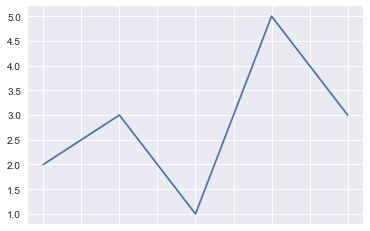

In [159]:
s = pd.Series([2, 3, 1, 5, 3], index=['a', 'b', 'c', 'd', 'e'])
s.plot()

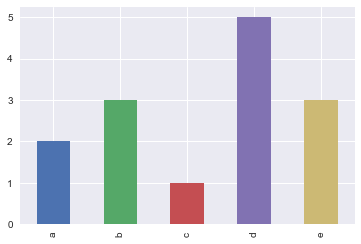

In [160]:
s.plot(kind='bar')

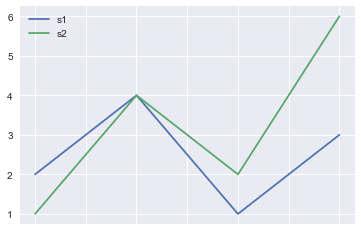

In [161]:
df = pd.DataFrame(
    [
        [2, 1],
        [4, 4],
        [1, 2],
        [3, 6]
    ],
    index=['a', 'b', 'c', 'd'],
    columns=['s1', 's2']
)
df.plot()

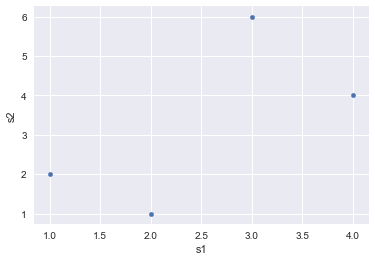

In [162]:
df.plot(x='s1', y='s2', kind='scatter')

## Charting with Seaborn

See the [Python Graph Gallery](https://python-graph-gallery.com/) for many examples of different types of charts including the code used to create them. As you learn to use the plotting libraries in many cases the fastest way to get results is just find an example from there and copy/paste/edit it.

There are a number of plotting libraries for Python; the most well known are matplotlib, Seaborn, Bokeh, and Plotly. Some offer more interactivity than others. Matplotlib is the most commonly used; it is very flexible but requires a fair amount of boilerplate code. There is a good tutorial on matplotlib [here](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python). We will instead use [Seaborn](https://seaborn.pydata.org/), which is built on top of matplotlib and simplifies its usage so that many plots just take one line of code.

In [163]:
# Let's get the more detailed Titanic data set
titanic3 = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


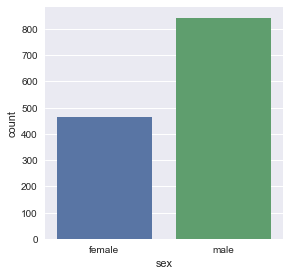

In [164]:
# We can use a factorplot to count categorical data
import seaborn as sns
sns.factorplot('sex', data=titanic3, kind='count')

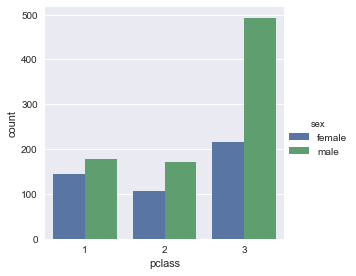

In [165]:
# Let's bring class in too:
sns.factorplot('pclass', data=titanic3, hue='sex', kind='count')

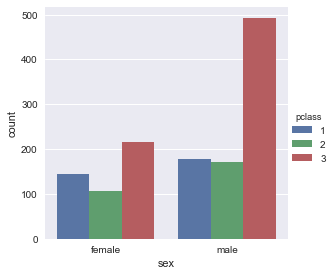

In [166]:
# Of course we can aggregate the other way too
sns.factorplot('sex', data=titanic3, hue='pclass', kind='count')

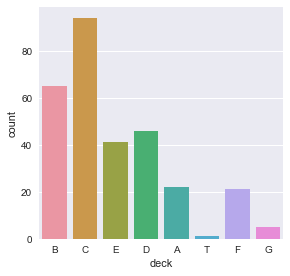

In [167]:
# Let's see how many people were on each deck
deck = pd.DataFrame(titanic3['cabin'].dropna().str[0])
deck.columns = ['deck']  # Get just the deck column
sns.factorplot('deck', data=deck, kind='count')

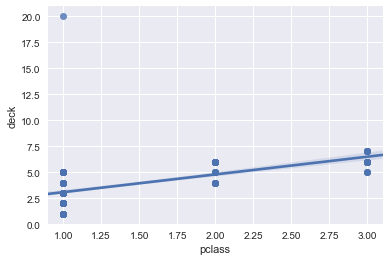

In [168]:
# What class passenger was on each deck?
df = titanic3[['cabin', 'pclass']].dropna()
df['deck'] = df.apply(lambda row: ord(row.cabin[0]) -64, axis=1)

sns.regplot(x=df["pclass"], y=df["deck"])

## Working with Dates and Time Series

Pandas provides several classes for dealing with datetimes: `Timestamp`, `Period`, and `Timedelta`, and corresponding index types based off these, namely `DatetimeIndex`, `PeriodIndex` and `TimedeltaIndex`.

For parsing dates we can use `pd.to_datetime` which can parse dates in many formats, or `pd.to_timedelta` to get a time delta. For formatting dates as strings the `Timestamp.strftime` method can be used.

For example, to get a four-week-long range of dates starting from Christmas 2017:

In [169]:
di = pd.to_datetime("December 25, 2017") + pd.to_timedelta(np.arange(4*7), 'D')
di

DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31', '2018-01-01',
               '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13',
               '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21'],
              dtype='datetime64[ns]', freq=None)

It's also possible to pass a list of dates to `to_datetime` to create a DatetimeIndex. A DatetimeIndex can be converted to a TimedeltaIndex by subtracting a start date:

In [170]:
di - di[0]

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days', '12 days', '13 days', '14 days',
                '15 days', '16 days', '17 days', '18 days', '19 days',
                '20 days', '21 days', '22 days', '23 days', '24 days',
                '25 days', '26 days', '27 days'],
               dtype='timedelta64[ns]', freq=None)

And of course the converse is possible:

In [171]:
(di - di[0]) + di[-1]

DatetimeIndex(['2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17'],
              dtype='datetime64[ns]', freq=None)

Another way of creating the indices is to specify range start and ends plus optionally the granularity, via the `periods` and `freq` arguments, using the APIs `pd.date_range`, `pd.timedelta_range`, and `pd.interval_range`:

In [172]:
pd.date_range('2017-12-30', '2017-12-31')

DatetimeIndex(['2017-12-30', '2017-12-31'], dtype='datetime64[ns]', freq='D')

In [173]:
pd.date_range('2017-12-30', '2017-12-31', freq='h')  # Hourly frequency

DatetimeIndex(['2017-12-30 00:00:00', '2017-12-30 01:00:00',
               '2017-12-30 02:00:00', '2017-12-30 03:00:00',
               '2017-12-30 04:00:00', '2017-12-30 05:00:00',
               '2017-12-30 06:00:00', '2017-12-30 07:00:00',
               '2017-12-30 08:00:00', '2017-12-30 09:00:00',
               '2017-12-30 10:00:00', '2017-12-30 11:00:00',
               '2017-12-30 12:00:00', '2017-12-30 13:00:00',
               '2017-12-30 14:00:00', '2017-12-30 15:00:00',
               '2017-12-30 16:00:00', '2017-12-30 17:00:00',
               '2017-12-30 18:00:00', '2017-12-30 19:00:00',
               '2017-12-30 20:00:00', '2017-12-30 21:00:00',
               '2017-12-30 22:00:00', '2017-12-30 23:00:00',
               '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [174]:
pd.date_range('2017-12-30', periods=4)  # 4 values using the default frequency of day

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02'], dtype='datetime64[ns]', freq='D')

In [175]:
pd.date_range('2017-12-30', periods=4, freq='h')  # 4 values using hourly frequency 

DatetimeIndex(['2017-12-30 00:00:00', '2017-12-30 01:00:00',
               '2017-12-30 02:00:00', '2017-12-30 03:00:00'],
              dtype='datetime64[ns]', freq='H')

Periods represent time intervals locked to timestamps. Consider the difference below:

In [176]:
pd.date_range('2017-01', '2017-12', freq='M')  # This gives us 12 dates, one for each month, on the last day of each month

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='M')

In [177]:
pd.period_range('2017-01', '2017-12', freq='M')  # This gives us 12 month long periods

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

You may wonder why the dates above were on the last day of each month. Pandas uses frequency codes, as follows:

| Code | Meaning |
|------|---------|
| D | Calendar day |
| B | Business day |
| W | Weekly |
| MS | Month start |
| BMS | Business month start |
| M | Month end |
| BM | Business month end |
| QS | Quarter start |
| BQS | Business quarter start |
| Q | Quarter end |
| BQ | Business quarter end |
| AS | Year start |
| A | Year end |
| BAS | Business year start |
| BS | Business year end |
| T	| Minutes |
| S	| Seconds |
| L	| Milliseonds |
| U	| Microseconds |

These can also be combined in some cases; e.g. "!H30T" or "90T" each represent 90 minutes:

In [178]:
pd.date_range('2017-01', periods=16, freq='1H30T') 

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:30:00',
               '2017-01-01 03:00:00', '2017-01-01 04:30:00',
               '2017-01-01 06:00:00', '2017-01-01 07:30:00',
               '2017-01-01 09:00:00', '2017-01-01 10:30:00',
               '2017-01-01 12:00:00', '2017-01-01 13:30:00',
               '2017-01-01 15:00:00', '2017-01-01 16:30:00',
               '2017-01-01 18:00:00', '2017-01-01 19:30:00',
               '2017-01-01 21:00:00', '2017-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='90T')

We can also add month offsets to annual or quarterly frequencies or day of week constraints to weekly frequencies:

In [179]:
pd.date_range('2017', periods=4, freq='QS-FEB')  # 4 quarters starting from beginning of February

DatetimeIndex(['2017-02-01', '2017-05-01', '2017-08-01', '2017-11-01'], dtype='datetime64[ns]', freq='QS-FEB')

In [180]:
pd.date_range('2017-01', periods=4, freq='W-MON')  # First 4 Mondays in Jan 2017

DatetimeIndex(['2017-01-02', '2017-01-09', '2017-01-16', '2017-01-23'], dtype='datetime64[ns]', freq='W-MON')

So what use are all these? To understand that we need some time-series data. Let's get the eBay daily stock closing price for 2017:

In [181]:
import sys
!conda install --yes --prefix {sys.prefix} pandas-datareader

Solving environment: done

# All requested packages already installed.



2y


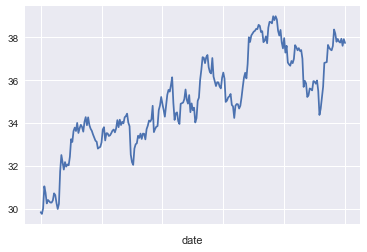

In [182]:
from pandas_datareader import data

ebay = data.DataReader('EBAY', start='2017', end='2018', data_source='iex')['close']
ebay.plot()

In [183]:
ebay.head()

date
2017-01-03    29.84
2017-01-04    29.76
2017-01-05    30.01
2017-01-06    31.05
2017-01-09    30.75
Name: close, dtype: float64

In [184]:
ebay.index

Index(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
       '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17',
       ...
       '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
       '2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29'],
      dtype='object', name='date', length=251)

Our index is not timestamp-based, so let's fix that:

In [185]:
ebay.index = pd.to_datetime(ebay.index)
ebay.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='date', length=251, freq=None)

Let's plot just January prices:

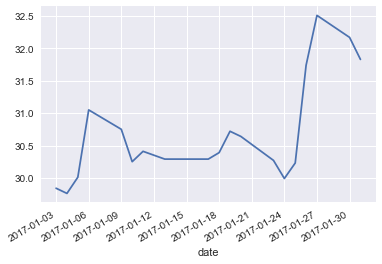

In [186]:
ebay["2017-01"].plot()

Let's plot weekly closing prices:

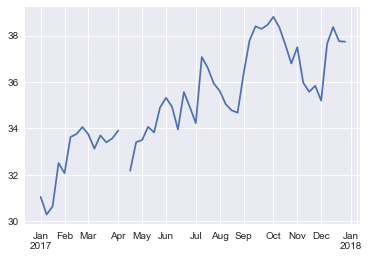

In [187]:
ebay[pd.date_range('2017-01', periods=52, freq='W-FRI')].plot()  

This is just a small sample of what Pandas can do with time series; Pandas came out of financial computation and has very rich capabilities in this area.

## Summarizing Data with pandas_profiling and facets

`pandas_profiling` is a Python package that can produce much more detailed summaries of data than the `.describe()` method. In this case we must install with `pip` and the right way to do this from the notebook is:

In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [205]:
%matplotlib inline

import pandas_profiling
import seaborn as sns;

titanic = sns.load_dataset('titanic')

pandas_profiling.ProfileReport(titanic)  # You may need to run cell twice

Number of variables,15
Number of observations,891
Total Missing (%),6.5%
Total size in memory,80.6 KiB
Average record size in memory,92.6 B
Numeric,5
Categorical,7
Boolean,3
Date,0
Text (Unique),0
Rejected,0


Facets is a library from Google that looks very good. It has similar functionality to pandas_profiling as well as some powerful visualization. Installation is more complex so we won't use it now but it is worth considering.

https://github.com/pair-code/facets

## Handling Data that Exceeds Your System's RAM

Pandas is an in-memory system. The use of NumPy means it uses memory very efficiently but you are still limited by the RAM you have available. If your data is too large, there are several options available, including:

- process the data sequentially (may not be possible but see [here](https://hackernoon.com/analysing-1-4-billion-rows-with-python-6cec86ca9d73) for an interesting approach)
- partition the data into chunks and process those separately
- partition the data into chunks and use multiple computers configured as a cluster with `ipyparallel` (https://ipyparallel.readthedocs.io/en/latest/)
- use a DataFrame-like library that handles larger datasets, like Dask DataFrames (http://dask.pydata.org/en/latest/dataframe.html) 
- use a tool like [Apache Drill](https://drill.apache.org/) which can SQL queries against files on disk in formats like CSV 
- putting the data in a database and operating on a subset in Pandas using a SELECT statement.

These are all out of scope of this document but we will briefly elaborate on the last two. Python comes standard with an implementation of Sqlite, in the package `sqlite3`. Pandas supports reading a DataFrame from the result of running a query against a Sqlite database. Here's a very simple example of how that may look:

```python
import sqlite3 as lite

with lite.connect('mydata.db') as con:
    query = 'select * from sales limit 100'
    df = pd.read_sql(query, con)
```

You can read more about Sqlite here: https://sqlite.org/quickstart.html.

Dask supports chunked dataframes that support most of the functionality of Pandas. The key additional parameter is `blocksize` which specifies the maximum size of a chunk of data to read into memory at one time. In addition, Dask methods are lazily evaluated; you must explicitly call a `.compute()` method to kick off the calculation. Here is a simple example: assume we have multiple CSV files containing temperature measurements. We could compute the mean temperature with something like:

```python
import dask.dataframe as dd

df = dd.read_csv('temp*.csv', blocksize=25e6)  # Use 25MB chunks
df.temperature.mean().compute()
```


## Adding Interactivity with ipywidgets

`ipywidgets` is an extension package for Jupyter that allows output cells to include interactive HTML elements. To install, you will need to run a command to enable the extension from a terminal and then restart Jupyter. First, install the package; the code below shows the right way to do this from within the notebook:

In [206]:
!conda install -c conda-forge --prefix {sys.prefix} --yes ipywidgets

Solving environment: done

# All requested packages already installed.



Now you need to run this command from your terminal, kill and restart JupyterLab, then return here.

    jupyter labextension install @jupyter-widgets/jupyterlab-manager

(You can run it from within JupyterLab but you will still need a restart before the widgets will work).

We will look at a simple example using the `interact` function from `ipywidgets`. You call this giving it a function as the first argument, followed by zero or more additional arguments that can be tuples, lists or dictionaries. These arguments will each become interactive controls like sliders and drop-downs, and any change in their values will cause the function to be called again with the new values as arguments.

See http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html for more info on creating other types of controls when using `interact`.


In [207]:
from ipywidgets import interact
import pandas as pd

df = pd.DataFrame([[2, 1], [4, 4], [1, 2], [3, 6]], index=['a', 'b', 'c', 'd'], columns=['s1', 's2'])


def plot_graph(kind, col):
    what = df if col == 'all' else df[col]
    what.plot(kind=kind)


interact(plot_graph, kind=['line', 'bar'], col=['all', 's1', 's2'])


interactive(children=(Dropdown(description='kind', options=('line', 'bar'), value='line'), Dropdown(descriptio…

<function __main__.plot_graph>

## Some Useful Packages and Resources

- `openpyxl` allows you to create and work directly with Excel spreadsheets
- `faker` can create fake data like names, addresses, credit card numbers, and social security numbers
- `numba` includes a `@jit` decorator that can [speed up the execution of many functions](http://nbviewer.jupyter.org/github/akittas/presentations/blob/master/pythess/numba/numba.ipynb); useful when crunching data outside of Pandas (it won't speed up Pandas code)
- `moviepy` allows you to edit video frame-by-frame (or even create video)
- [ray](https://rise.cs.berkeley.edu/blog/pandas-on-ray/) is a new package that lets you leverage your GPU to speed up pandas code
- [qgrid](https://github.com/quantopian/qgrid) is a Jupyter extension that adds interactive sorting, filtering and editing of DataFrames

Video tutorials on Pandas: http://www.dataschool.io/easier-data-analysis-with-pandas/

Jake VanderPlas' excellent Python Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/

Tom Augspurger has a great [multi-part series](http://tomaugspurger.github.io/modern-1-intro) on Pandas aimed at intermediate to advanced users. 

## Example: Loading JSON into a DataFrame and Expanding Complex Fields

In this example we'll see how we can load some structured data and process it into a flat table form better suited to machine learning.

In [208]:
# Let's get some data; top stories from lobste.rs; populate a DataFrame with the JSON
stories = pd.read_json('https://lobste.rs/hottest.json')
stories.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id,short_id_url,submitter_user,tags,title,upvotes,url
0,2,https://lobste.rs/s/9fkwad/it_s_impossible_pro...,2018-04-28 20:52:33,,0,12,9fkwad,https://lobste.rs/s/9fkwad,"{'username': 'apg', 'created_at': '2013-12-11T...","[privacy, security]",It’s Impossible to Prove Your Laptop Hasn’t Be...,12,https://theintercept.com/2018/04/28/computer-m...
1,0,https://lobste.rs/s/iwvkly/unfixed_google_inbo...,2018-04-28 07:03:40,,0,33,iwvkly,https://lobste.rs/s/iwvkly,"{'username': 'eligrey', 'created_at': '2017-12...","[security, show]",Unfixed Google Inbox recipient spoofing vulner...,33,https://eligrey.com/blog/google-inbox-spoofing...
2,1,https://lobste.rs/s/xjsf2r/chrome_is_showing_t...,2018-04-29 02:13:21,,0,6,xjsf2r,https://lobste.rs/s/xjsf2r,"{'username': 'stephenr', 'created_at': '2015-0...","[browsers, mobile, web]",Chrome is showing third party external links o...,6,https://twitter.com/backlon/status/99004255788...
3,4,https://lobste.rs/s/js0ine/nethack_devteam_is_...,2018-04-28 14:34:02,"<p>Interestingly, this will be the final relea...",0,13,js0ine,https://lobste.rs/s/js0ine,"{'username': 'intercal', 'created_at': '2016-1...","[c, games]",The NetHack DevTeam is happy to announce the r...,13,https://groups.google.com/forum/#!topic/rec.ga...
4,0,https://lobste.rs/s/9ac8ha/how_get_core_dump_f...,2018-04-28 22:35:08,,0,7,9ac8ha,https://lobste.rs/s/9ac8ha,"{'username': 'calvin', 'created_at': '2014-07-...",[debugging],How to get a core dump for a segfault on Linux,7,https://jvns.ca/blog/2018/04/28/debugging-a-se...


In [209]:
# Use the "short_id' field as the index
stories = stories.set_index('short_id')

# Show the first few rows
stories.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,submitter_user,tags,title,upvotes,url
short_id,,,,,,,,,,,,
9fkwad,2,https://lobste.rs/s/9fkwad/it_s_impossible_pro...,2018-04-28 20:52:33,,0,12,https://lobste.rs/s/9fkwad,"{'username': 'apg', 'created_at': '2013-12-11T...","[privacy, security]",It’s Impossible to Prove Your Laptop Hasn’t Be...,12,https://theintercept.com/2018/04/28/computer-m...
iwvkly,0,https://lobste.rs/s/iwvkly/unfixed_google_inbo...,2018-04-28 07:03:40,,0,33,https://lobste.rs/s/iwvkly,"{'username': 'eligrey', 'created_at': '2017-12...","[security, show]",Unfixed Google Inbox recipient spoofing vulner...,33,https://eligrey.com/blog/google-inbox-spoofing...
xjsf2r,1,https://lobste.rs/s/xjsf2r/chrome_is_showing_t...,2018-04-29 02:13:21,,0,6,https://lobste.rs/s/xjsf2r,"{'username': 'stephenr', 'created_at': '2015-0...","[browsers, mobile, web]",Chrome is showing third party external links o...,6,https://twitter.com/backlon/status/99004255788...
js0ine,4,https://lobste.rs/s/js0ine/nethack_devteam_is_...,2018-04-28 14:34:02,"<p>Interestingly, this will be the final relea...",0,13,https://lobste.rs/s/js0ine,"{'username': 'intercal', 'created_at': '2016-1...","[c, games]",The NetHack DevTeam is happy to announce the r...,13,https://groups.google.com/forum/#!topic/rec.ga...
9ac8ha,0,https://lobste.rs/s/9ac8ha/how_get_core_dump_f...,2018-04-28 22:35:08,,0,7,https://lobste.rs/s/9ac8ha,"{'username': 'calvin', 'created_at': '2014-07-...",[debugging],How to get a core dump for a segfault on Linux,7,https://jvns.ca/blog/2018/04/28/debugging-a-se...


In [210]:
# Take a look at the submitter_user field; it is a dictionary itself.
stories.submitter_user[0]

{'about': 'Interested in programming languages, distributed systems and security (not very good at any of them). Currently: Metrics and operations at Heroku.\r\n\r\nPreviously: founder of [hack and tell](http://hackandtell.org): an informal, monthlish show and tell for hackers in NYC. Occasional SoCal surfer.\r\n\r\nElsewhere:\r\n\r\n* [homepage](http://apgwoz.com)\r\n* [blog](http://sigusr2.net)\r\n* [fediverse](https://bsd.network/@apg)\r\n\r\nIt probably goes without saying, but opinions are my own.',
 'avatar_url': '/avatars/apg-100.png',
 'created_at': '2013-12-11T11:00:03.000-06:00',
 'github_username': 'apg',
 'is_admin': False,
 'is_moderator': False,
 'karma': 3808,
 'twitter_username': 'apgwoz',
 'username': 'apg'}

In [211]:
# We want to expand these fields into our dataframe. First expand into its own dataframe.
user_df = stories.submitter_user.apply(pd.Series)
user_df.head()

,about,avatar_url,created_at,github_username,is_admin,is_moderator,karma,twitter_username,username
short_id,,,,,,,,,
9fkwad,"Interested in programming languages, distribut...",/avatars/apg-100.png,2013-12-11T11:00:03.000-06:00,apg,False,False,3808,apgwoz,apg
iwvkly,I'm [Eli Grey](https://eligrey.com).,/avatars/eligrey-100.png,2017-12-23T20:12:34.000-06:00,eligrey,False,False,33,sephr,eligrey
xjsf2r,Ops/infrastructure and web app development.\r\...,/avatars/stephenr-100.png,2015-04-22T19:29:06.000-05:00,NaN,False,False,497,NaN,stephenr
js0ine,"I like programming, and programming languages ...",/avatars/intercal-100.png,2016-11-11T08:55:13.000-06:00,NaN,False,False,284,NaN,intercal
9ac8ha,Soon we will all have special names... names d...,/avatars/calvin-100.png,2014-07-01T06:47:13.000-05:00,NattyNarwhal,False,False,25997,NaN,calvin


In [212]:
# We should make sure there are no collisions in column names.
set(user_df.columns).intersection(stories.columns)

{'created_at'}

In [213]:
# We can rename the column to avoid the clash
user_df = user_df.rename(columns={'created_at': 'user_created_at'})

In [214]:
# Now combine them, dropping the original compound column that we are expanding.
stories = pd.concat([stories.drop(['submitter_user'], axis=1), user_df], axis=1)
stories.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,tags,title,upvotes,url,about,avatar_url,user_created_at,github_username,is_admin,is_moderator,karma,twitter_username,username
short_id,,,,,,,,,,,,,,,,,,,,
9fkwad,2,https://lobste.rs/s/9fkwad/it_s_impossible_pro...,2018-04-28 20:52:33,,0,12,https://lobste.rs/s/9fkwad,"[privacy, security]",It’s Impossible to Prove Your Laptop Hasn’t Be...,12,https://theintercept.com/2018/04/28/computer-m...,"Interested in programming languages, distribut...",/avatars/apg-100.png,2013-12-11T11:00:03.000-06:00,apg,False,False,3808,apgwoz,apg
iwvkly,0,https://lobste.rs/s/iwvkly/unfixed_google_inbo...,2018-04-28 07:03:40,,0,33,https://lobste.rs/s/iwvkly,"[security, show]",Unfixed Google Inbox recipient spoofing vulner...,33,https://eligrey.com/blog/google-inbox-spoofing...,I'm [Eli Grey](https://eligrey.com).,/avatars/eligrey-100.png,2017-12-23T20:12:34.000-06:00,eligrey,False,False,33,sephr,eligrey
xjsf2r,1,https://lobste.rs/s/xjsf2r/chrome_is_showing_t...,2018-04-29 02:13:21,,0,6,https://lobste.rs/s/xjsf2r,"[browsers, mobile, web]",Chrome is showing third party external links o...,6,https://twitter.com/backlon/status/99004255788...,Ops/infrastructure and web app development.\r\...,/avatars/stephenr-100.png,2015-04-22T19:29:06.000-05:00,NaN,False,False,497,NaN,stephenr
js0ine,4,https://lobste.rs/s/js0ine/nethack_devteam_is_...,2018-04-28 14:34:02,"<p>Interestingly, this will be the final relea...",0,13,https://lobste.rs/s/js0ine,"[c, games]",The NetHack DevTeam is happy to announce the r...,13,https://groups.google.com/forum/#!topic/rec.ga...,"I like programming, and programming languages ...",/avatars/intercal-100.png,2016-11-11T08:55:13.000-06:00,NaN,False,False,284,NaN,intercal
9ac8ha,0,https://lobste.rs/s/9ac8ha/how_get_core_dump_f...,2018-04-28 22:35:08,,0,7,https://lobste.rs/s/9ac8ha,[debugging],How to get a core dump for a segfault on Linux,7,https://jvns.ca/blog/2018/04/28/debugging-a-se...,Soon we will all have special names... names d...,/avatars/calvin-100.png,2014-07-01T06:47:13.000-05:00,NattyNarwhal,False,False,25997,NaN,calvin


In [215]:
# The tags field is another compound field.
stories.tags.head()

short_id
9fkwad        [privacy, security]
iwvkly           [security, show]
xjsf2r    [browsers, mobile, web]
js0ine                 [c, games]
9ac8ha                [debugging]
Name: tags, dtype: object

In [216]:
# Make a new dataframe with the tag lists expanded into columns of Series.
tag_df = stories.tags.apply(pd.Series)
tag_df.head()

,0,1,2,3
short_id,,,,
9fkwad,privacy,security,NaN,NaN
iwvkly,security,show,NaN,NaN
xjsf2r,browsers,mobile,web,NaN
js0ine,c,games,NaN,NaN
9ac8ha,debugging,NaN,NaN,NaN


In [217]:
# Pivot the DataFrame
tag_df = tag_df.stack()
tag_df

short_id   
9fkwad    0             privacy
          1            security
iwvkly    0            security
          1                show
xjsf2r    0            browsers
          1              mobile
          2                 web
js0ine    0                   c
          1               games
9ac8ha    0           debugging
sgvyct    0             android
          1               linux
          2          networking
bq7zc0    0            hardware
yiwxq1    0          javascript
fe8sly    0          philosophy
          1         programming
yvogbz    0                math
          1       visualization
vqaslr    0             release
          1                show
cy0nbk    0         programming
          1             scaling
12pegw    0                  go
          1             release
mtpakk    0             clojure
k6evtc    0             culture
          1             haskell
jgyhfp    0           compilers
          1                lisp
          2                 

In [218]:
# Expand into a 1-hot encoding
tag_df = pd.get_dummies(tag_df)
tag_df.head()

ai  android  art  browsers  c  clojure  compilers  crypto  \
short_id                                                                
9fkwad   0   0        0    0         0  0        0          0       0   
         1   0        0    0         0  0        0          0       0   
iwvkly   0   0        0    0         0  0        0          0       0   
         1   0        0    0         0  0        0          0       0   
xjsf2r   0   0        0    0         1  0        0          0       0   

            cryptocurrencies  culture ...   programming  python  release  \
short_id                              ...                                  
9fkwad   0                 0        0 ...             0       0        0   
         1                 0        0 ...             0       0        0   
iwvkly   0                 0        0 ...             0       0        0   
         1                 0        0 ...             0       0        0   
xjsf2r   0                 0        0 ...             0       0        0   

            rust  scaling  security  show  video  visualization  web  
short_id                                                              
9fkwad   0     0        0         0     0      0              0    0  
         1     0        0         1     0      0              0    0  
iwvkly   0     0        0         1     0      0              0    0  
         1     0        0         0     1      0              0    0  
xjsf2r   0     0        0         0     0      0              0    0  

[5 rows x 38 columns]

In [219]:
# Merge multiple rows
tag_df = tag_df.sum(level=0)
tag_df.head()

,ai,android,art,browsers,c,clojure,compilers,crypto,cryptocurrencies,culture,...,programming,python,release,rust,scaling,security,show,video,visualization,web
short_id,,,,,,,,,,,,,,,,,,,,,
9fkwad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
iwvkly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
xjsf2r,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
js0ine,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9ac8ha,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# And add back to the original dataframe
stories = pd.concat([stories.drop('tags', axis=1), tag_df], axis=1)
stories.head()

,comment_count,comments_url,created_at,description,downvotes,score,short_id_url,title,upvotes,url,...,programming,python,release,rust,scaling,security,show,video,visualization,web
short_id,,,,,,,,,,,,,,,,,,,,,
9fkwad,2,https://lobste.rs/s/9fkwad/it_s_impossible_pro...,2018-04-28 20:52:33,,0,12,https://lobste.rs/s/9fkwad,It’s Impossible to Prove Your Laptop Hasn’t Be...,12,https://theintercept.com/2018/04/28/computer-m...,...,0,0,0,0,0,1,0,0,0,0
iwvkly,0,https://lobste.rs/s/iwvkly/unfixed_google_inbo...,2018-04-28 07:03:40,,0,33,https://lobste.rs/s/iwvkly,Unfixed Google Inbox recipient spoofing vulner...,33,https://eligrey.com/blog/google-inbox-spoofing...,...,0,0,0,0,0,1,1,0,0,0
xjsf2r,1,https://lobste.rs/s/xjsf2r/chrome_is_showing_t...,2018-04-29 02:13:21,,0,6,https://lobste.rs/s/xjsf2r,Chrome is showing third party external links o...,6,https://twitter.com/backlon/status/99004255788...,...,0,0,0,0,0,0,0,0,0,1
js0ine,4,https://lobste.rs/s/js0ine/nethack_devteam_is_...,2018-04-28 14:34:02,"<p>Interestingly, this will be the final relea...",0,13,https://lobste.rs/s/js0ine,The NetHack DevTeam is happy to announce the r...,13,https://groups.google.com/forum/#!topic/rec.ga...,...,0,0,0,0,0,0,0,0,0,0
9ac8ha,0,https://lobste.rs/s/9ac8ha/how_get_core_dump_f...,2018-04-28 22:35:08,,0,7,https://lobste.rs/s/9ac8ha,How to get a core dump for a segfault on Linux,7,https://jvns.ca/blog/2018/04/28/debugging-a-se...,...,0,0,0,0,0,0,0,0,0,0


## Further Reading

The definitive Pandas book is the one by Wes McKinney, original author of Pandas. I also recommend Jake Vanderplas's book, and the one by Matt Harrison. The links below are affiliate links where I may earn a small commission:

<div>
<a target="_blank"  style="float:left;margin:50px" href="https://amzn.to/3Eydzy0"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=1491957662&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=_SL250_&tag=grahamwheel0b-20" ></a><img src="//ir-na.amazon-adsystem.com/e/ir?t=grahamwheel0b-20&l=am2&o=1&a=1491957662" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />

<a target="_blank"  style="float:left;margin:50px" href="https://amzn.to/31b59iv"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=1491912057&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=_SL250_&tag=grahamwheel0b-20" ></a><img src="//ir-na.amazon-adsystem.com/e/ir?t=grahamwheel0b-20&l=am2&o=1&a=1491912057" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />

<a target="_blank" style="float:left;margin:50px"  href="https://amzn.to/3ECiHRx"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=B01GIE03GW&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=_SL250_&tag=grahamwheel0b-20" ></a><img src="//ir-na.amazon-adsystem.com/e/ir?t=grahamwheel0b-20&l=am2&o=1&a=B01GIE03GW" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />

<a target="_blank" style="float:left;margin:50px"  href="https://amzn.to/3qGTEYW"><img border="0" src="//ws-na.amazon-adsystem.com/widgets/q?_encoding=UTF8&MarketPlace=US&ASIN=1491952962&ServiceVersion=20070822&ID=AsinImage&WS=1&Format=_SL250_&tag=grahamwheel0b-20" ></a><img src="//ir-na.amazon-adsystem.com/e/ir?t=grahamwheel0b-20&l=ur2&o=1&camp=1789" width="1" height="1" border="0" alt="" style="border:none !important; margin:0px !important;" />
</div>